# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [5]:
import pandas as pd
import numpy as np

In [6]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [7]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
777,7.2,0.23,0.19,13.70,0.052,47.0,197.0,0.99865,3.12,0.53,9.0,5,white
4257,5.8,0.32,0.23,1.50,0.033,39.0,121.0,0.98870,2.96,0.35,12.0,5,white
1793,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,white
2396,8.4,0.30,0.25,17.75,0.047,25.0,218.0,1.00016,2.98,0.66,9.1,5,white
5940,8.9,0.50,0.21,2.20,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,6,red


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [8]:
t= pd.pivot_table(data, values='citric acid', index='quality', aggfunc='count', columns='type')
t

type,red,white
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


In [10]:
data['Quality2']=np.where(data['quality']<=5, 0, 1)


In [11]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Quality2
1857,8.9,0.34,0.34,1.6,0.056,13.0,176.0,0.99460,3.14,0.47,9.7,5,white,0
4176,6.8,0.24,0.33,3.2,0.049,68.0,161.0,0.99324,3.10,0.69,10.2,6,white,1
4145,6.8,0.26,0.29,11.9,0.052,54.0,160.0,0.99546,3.03,0.58,10.4,6,white,1
4206,5.9,0.32,0.20,14.4,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,6,white,1
4756,6.0,0.38,0.26,3.5,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,7,white,1


# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


In [24]:
from sklearn import preprocessing

In [220]:
var_list=['fixed acidity',  'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for var in var_list:
    normalized_data[var] = pd.DataFrame(preprocessing.scale(data[var].values.reshape(-1, 1)))

normalized_data['type']=data['type']
normalized_data['Quality2']=data['Quality2']
normalized_data_bkp=normalized_data

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [87]:
normalized_data['TypeBinary']=np.where(normalized_data['type']=='white', 0, 1)

In [88]:
normalized_data.sample(5)

,0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Quality2,TypeBinary
3777,1.0,-0.551792,-0.058716,-0.265874,0.138050,-1.085723,0.590188,-0.225498,-1.159480,0.133722,-1.419867,1.432308,0.207999,white,1,0
2825,1.0,-0.706073,-0.544672,-0.678793,-0.450502,-0.229336,0.590188,0.800733,-0.712581,-0.363868,-0.210144,0.006875,0.207999,white,1,0
1329,1.0,0.913879,-0.909139,0.766426,-0.702739,-0.115152,-0.593041,-0.207804,-0.232332,-2.292031,-0.478971,-0.831615,-0.937230,white,0,0
6397,1.0,-0.243230,2.431811,-1.986373,-0.660699,-0.058059,-1.325517,-1.764844,0.127855,1.439897,0.663545,0.845365,0.207999,red,1,1
2855,1.0,-0.243230,-0.058716,-0.403514,-0.093167,-0.828807,0.871910,0.482248,-0.765942,0.195921,-0.680592,0.593818,1.353228,white,1,0


## Modelo 1:

Usando el pH y el dioxido sulfurico total para clasificar si el vino es del tipo blanco o rojo.

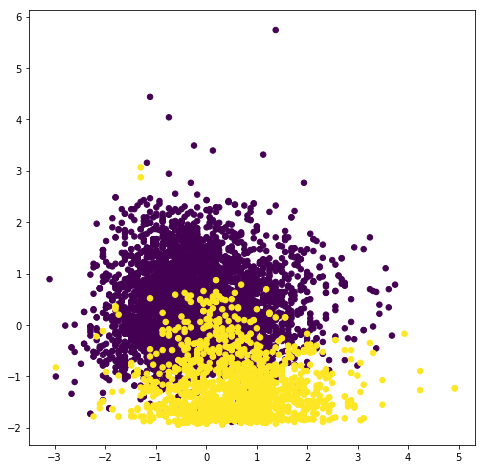

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(normalized_data['pH'], normalized_data['total sulfur dioxide'], c=normalized_data['TypeBinary'], s=30);

In [122]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf1 = SVC(kernel='linear')
X=normalized_data[['pH','total sulfur dioxide']].values
y=normalized_data['TypeBinary'].values
clf1.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

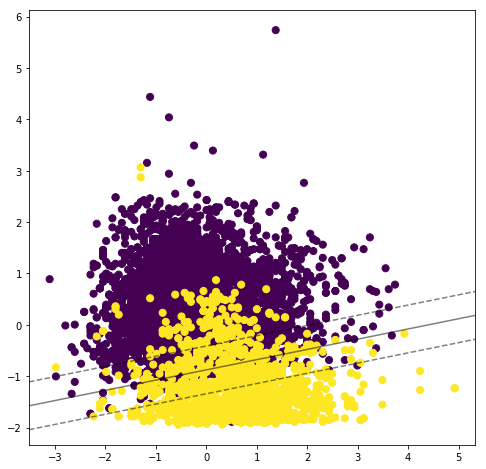

In [123]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf1)

## Modelo 2:

Usando el acidez fija y el acido citrico total para clasificar si el vino es del tipo blanco o rojo.

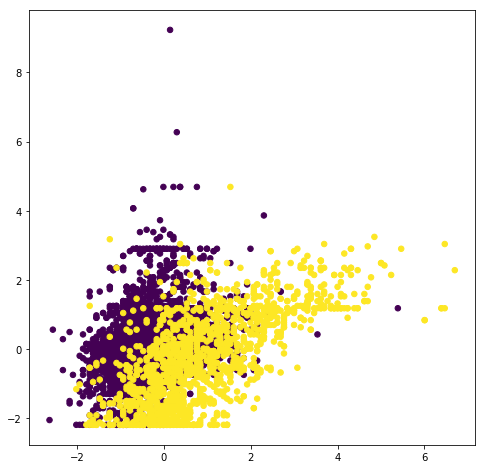

In [124]:
plt.figure(figsize=(8,8))
plt.scatter(normalized_data['fixed acidity'], normalized_data['citric acid'], c=normalized_data['TypeBinary'], s=30);

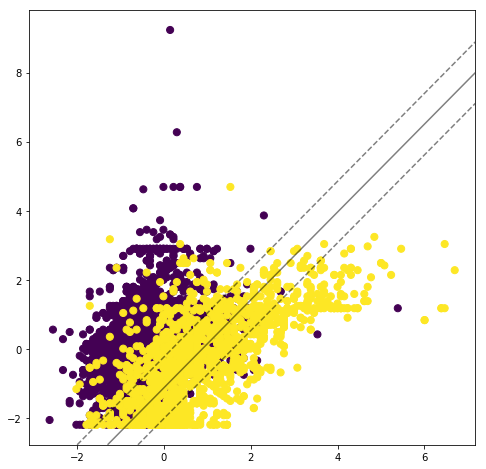

In [125]:
clf2 = SVC(kernel='linear')
X=normalized_data[['fixed acidity','citric acid']].values
y=normalized_data['TypeBinary'].values
clf2.fit(X, y)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf2)

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


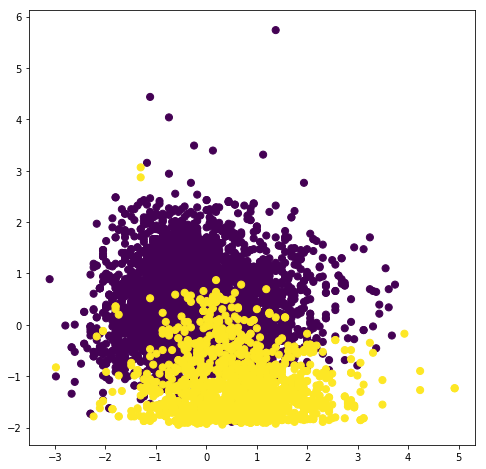

In [142]:
X=normalized_data[['pH','total sulfur dioxide']].values
y=normalized_data['TypeBinary'].values

clf1 = SVC(kernel='sigmoid').fit(X, y)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
# plot_svc_decision_function(clf);

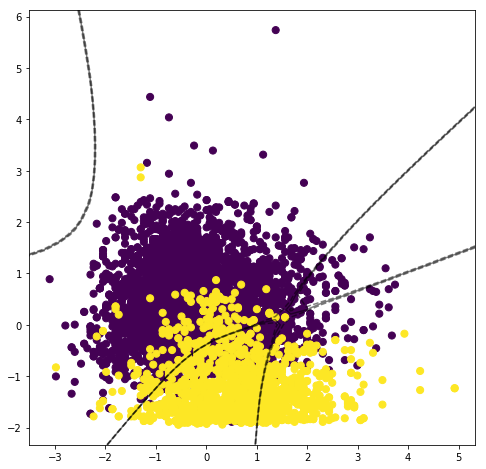

In [144]:
clf1 = SVC(kernel='sigmoid')
clf1.fit(X, y)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf1)

# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

In [150]:
C={0.1, 1, 10, 100, 1000}
gamma= {0.01, 0.001, 0.0001}

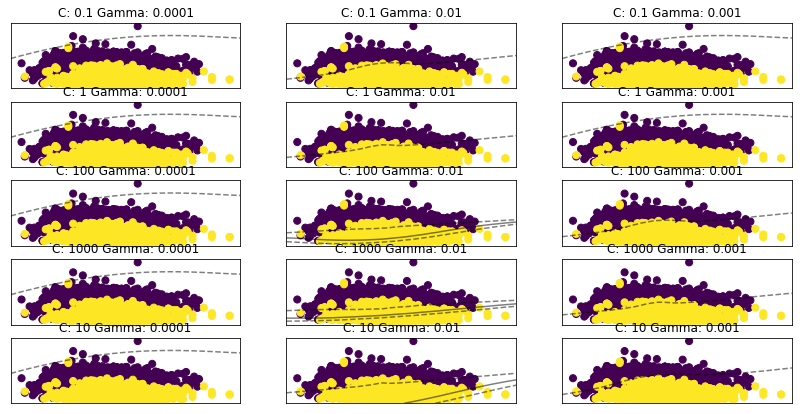

In [170]:
plt.figure(figsize=(14,7))
i=1
for c in C:
    for g in gamma:
        clf1 = SVC(C=c, gamma=g, kernel='poly')
        clf1.fit(X, y)
        
        plt.subplot(5, 3, i)
        plt.yticks([])
        plt.xticks([]) 
        plt.title('C: ' + repr(c) + ' Gamma: ' + repr(g))
        
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
        plot_svc_decision_function(clf1)
        i=i+1
    

# Exercise 6.5

Compare the results with other methods

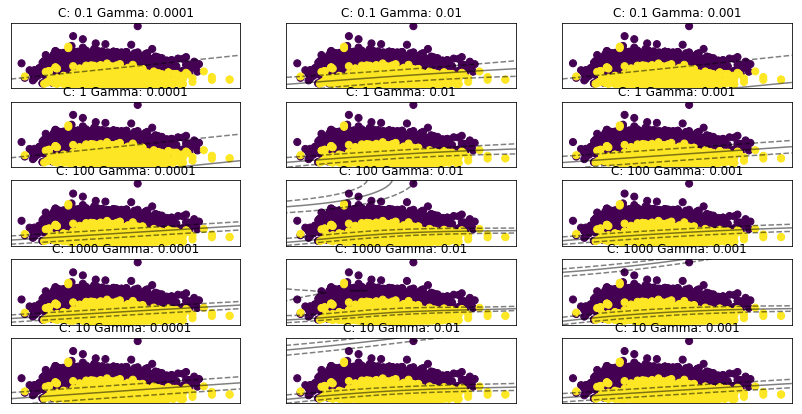

In [171]:
plt.figure(figsize=(14,7))
i=1
for c in C:
    for g in gamma:
        clf1 = SVC(C=c, gamma=g, kernel='rbf')
        clf1.fit(X, y)
        
        plt.subplot(5, 3, i)
        plt.yticks([])
        plt.xticks([]) 
        plt.title('C: ' + repr(c) + ' Gamma: ' + repr(g))
        
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
        plot_svc_decision_function(clf1)
        i=i+1

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

In [172]:
# define X and y
X = normalized_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].values
y = normalized_data['quality'].values

In [175]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [181]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
# examine the coefficients
print(linreg.coef_)

[ 0.11748274 -0.25526528 -0.03372807  0.2453784  -0.01760608  0.10666481
 -0.15076246 -0.19705894  0.08329939  0.12983931  0.35475841]


In [184]:
# make predictions
y_pred = linreg.predict(X_test)

array([ 0.41172147,  0.56572318, -0.24404453, ...,  1.22451036,
        0.72184069,  0.64040398])

In [185]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8211882041523406


# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [190]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.1 , normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8249420173042135


In [193]:
# alpha=0 is equivalent to linear regression
ridgereg = Ridge(alpha=1 , normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8711821251658562


# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [197]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)
# calculate RMSE
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]
0.9974192552049365


In [198]:
lassoreg = Lasso(alpha=0.1, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)
# calculate RMSE
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]
0.9974192552049365


In [199]:
lassoreg = Lasso(alpha=1, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)
# calculate RMSE
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]
0.9974192552049365


# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

In [222]:
# define X and y
X = normalized_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].values
y = normalized_data['Quality2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [213]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() #C=1e9,solver='liblinear',multi_class='auto')
logreg.fit(X_train, y_train)
normalized_data['Quality2Pred']=logreg.predict(X)

In [252]:
coeficientes_log=pd.DataFrame(np.transpose(logreg.coef_))
cols=pd.DataFrame(np.transpose(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']))
coeficientes_log=pd.concat([cols, coeficientes_log], axis=1, ignore_index=True)
print('Los coeficientes del modelo:')
coeficientes_log

Los coeficientes del modelo:


,0,1
0,fixed acidity,0.000000
1,volatile acidity,-0.485682
2,citric acid,0.000000
3,residual sugar,0.055742
4,chlorides,0.000000
5,free sulfur dioxide,0.000000
6,total sulfur dioxide,0.000000
7,density,0.000000
8,pH,0.000000
9,sulphates,0.114845


In [216]:
from sklearn.metrics import f1_score
print('El F1SCORE de la regresión logistica es:',f1_score(normalized_data['Quality2'], normalized_data['Quality2Pred']))

El F1SCORE de la regresión logistica es: 0.8062984832696538


# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

In [293]:
import pandas as pd
Columns= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
Coeficientes=pd.DataFrame(Columns, columns=['Variable'])

In [307]:
#Los datos ya estan normalizados...

C={0.01,0.1,1}
Penalty={'l1','l2'}
normalized_data=normalized_data_bkp

print('Comparando el f1 score: ')

for c in C:
    for p in Penalty:
        logreg = LogisticRegression(C=c, penalty=p,solver='liblinear')
        logreg.fit(X_train_scaled, y_train)
        Coeficientes['C:'+repr(c)+' Penalty: '+repr(p)]=logreg.coef_.reshape(-1,1)
        normalized_data['Quality2Pred']=logreg.predict(X)
        print(['C:'+repr(c)+' Penalty: '+repr(p), f1_score(normalized_data['Quality2'], normalized_data['Quality2Pred'])])



Comparando el f1 score: 
["C:0.1 Penalty: 'l2'", 0.8040446304044632]
["C:0.1 Penalty: 'l1'", 0.8049773229445284]
["C:1 Penalty: 'l2'", 0.8048299082781841]
["C:1 Penalty: 'l1'", 0.804368029739777]
["C:0.01 Penalty: 'l2'", 0.7998602050326188]
["C:0.01 Penalty: 'l1'", 0.7946135831381732]


In [306]:
print('Comparando los coeficientes: ')
Coeficientes


Comparando los coeficientes: 


,Variable,C:0.1 Penalty: 'l2',C:0.1 Penalty: 'l1',C:1 Penalty: 'l2',C:1 Penalty: 'l1',C:0.01 Penalty: 'l2',C:0.01 Penalty: 'l1'
0,fixed acidity,0.150285,0.034278,0.162758,0.146173,0.094582,0.000000
1,volatile acidity,-0.713738,-0.722694,-0.732672,-0.735190,-0.577520,-0.485656
2,citric acid,-0.123521,-0.103920,-0.133460,-0.131534,-0.059640,0.000000
3,residual sugar,0.425310,0.287010,0.448643,0.427810,0.302665,0.055780
4,chlorides,-0.051777,-0.048308,-0.045907,-0.046152,-0.085136,0.000000
5,free sulfur dioxide,0.260637,0.230319,0.272479,0.269350,0.185709,0.000000
6,total sulfur dioxide,-0.390394,-0.346144,-0.406996,-0.401615,-0.287113,0.000000
7,density,-0.208976,0.000000,-0.222125,-0.189768,-0.177447,0.000000
8,pH,0.106526,0.036535,0.112681,0.102637,0.081105,0.000000
9,sulphates,0.318938,0.283979,0.327022,0.322200,0.265454,0.114845


Con el parámetro l1, la reducción de C descarta variables,  lo que no ocurre con el parámetro l2.